# Plot de Batimentos Cardíacos

In [4]:
import os
from os.path import join, dirname
from dotenv import load_dotenv

dotenv_path = join(dirname('__file__'), '.env')

load_dotenv(dotenv_path)

ROOT_PATH = os.environ.get("ROOT_PATH")
DATALAKE_PATH = os.environ.get("DATALAKE_PATH")


In [28]:
import pandas as pd
import numpy as np 
from scipy.io import loadmat
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec


In [47]:
file = 'PN00-4'

In [48]:
ictal = loadmat(f"{DATALAKE_PATH}/siena/processed/ecg_beats/ictal/{file}.mat")
pre_ictal = loadmat(f"{DATALAKE_PATH}/siena/processed/ecg_beats/pre-ictal/{file}.mat")
pos_ictal = loadmat(f"{DATALAKE_PATH}/siena/processed/ecg_beats/pos-ictal/{file}.mat")
normal = loadmat(f"{DATALAKE_PATH}/siena/processed/ecg_beats/normal/{file}.mat")
recuperacao = loadmat(f"{DATALAKE_PATH}/siena/processed/ecg_beats/recuperacao/{file}.mat")

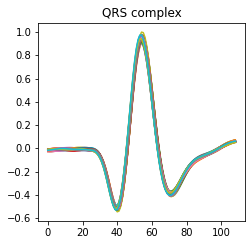

In [52]:
def set_ax(data, row, col, gs, wave, label):
    ax = fig.add_subplot(gs[row,col])
    
    for idx in range(data[wave].shape[1]):
        ax.plot(data[wave][:,idx])
    ax.set_title(label)


fig = plt.figure(figsize=(17, 8))

gs = GridSpec(nrows=2, ncols=4)


set_ax(data=normal, row=0, col=0, gs=gs, wave='QRS', label='QRS complex')




# ax0 = fig.add_subplot(gs[0,0])

# for idx in range(normal['B'].shape[1]):
#     ax0.plot(normal['B'][:,idx])

# ax0.set_title('ECG beats')


# ax1 = fig.add_subplot(gs[0,1])

# for idx in range(ictal['B'].shape[1]):
#     ax1.plot(ictal['B'][:,idx])

# ax1.set_title('ECG beats')

# ax2 = fig.add_subplot(gs[0,2])

# for idx in range(pre_ictal['B'].shape[1]):
#     ax2.plot(pre_ictal['B'][:,idx])

# ax2.set_title('ECG beats')

# ax3 = fig.add_subplot(gs[0,3])

# for idx in range(pos_ictal['B'].shape[1]):
#     ax3.plot(pos_ictal['B'][:,idx])

# ax3.set_title('ECG beats')

# ax1 = fig.add_subplot(gs[1, 0])
# ax1.set_title('P waves')

# for idx in range(normal['P'].shape[1]):
#     ax1.plot(normal['P'][:,idx])

# ax2 = fig.add_subplot(gs[1, 1])
# ax2.set_title('QRS complex')

# for idx in range(normal['QRS'].shape[1]):
#     ax2.plot(normal['QRS'][:,idx])

# ax3 = fig.add_subplot(gs[1, 2])
# ax3.set_title('T waves')
# for idx in range(normal['T'].shape[1]):
#     ax3.plot(normal['T'][:,idx])

In [ ]:
ictal = load(lake + '/siena/processed/ecg_beats/ictal/' + file + '.mat')
pre_ictal = load(lake + '/siena/processed/ecg_beats/pre-ictal/' + file + '.mat')
pos_ictal = load(lake + '/siena/processed/ecg_beats/pos-ictal/' + file + '.mat')
normal = load(lake + '/siena/processed/ecg_beats/normal/' + file + '.mat')
recuperacao = load(lake + '/siena/processed/ecg_beats/recuperacao/' + file + '.mat')


x_5 = var(x5)+ log5;
y_5 = skewness(x5) + log5;
z_5 = kurtosis(x5) + log5;


plot1 = scatter3(x_1, y_1, z_1,70,'filled' )
hold on
plot2 = scatter3(x_2, y_2, z_2,70,'filled' )
hold on 
plot3 = scatter3(x_3, y_3, z_3,70,'filled' )
hold on
plot4 = scatter3(x_4, y_4, z_4,70,'filled' )
hold on 
plot5 = scatter3(x_5, y_5, z_5,70,'filled' )

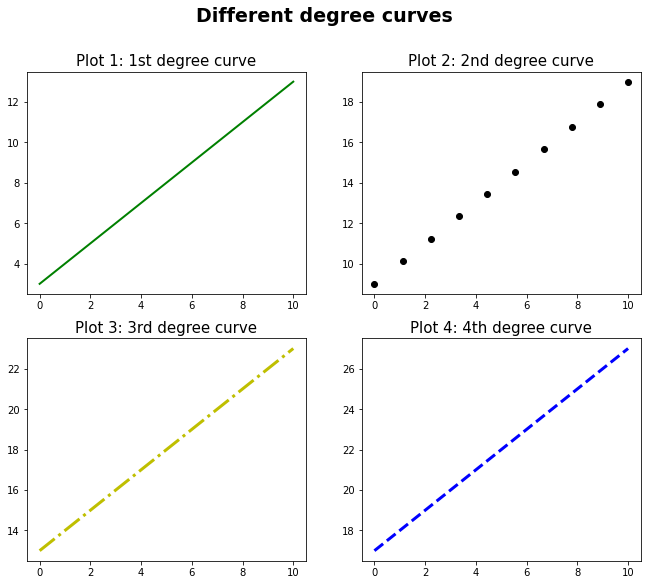

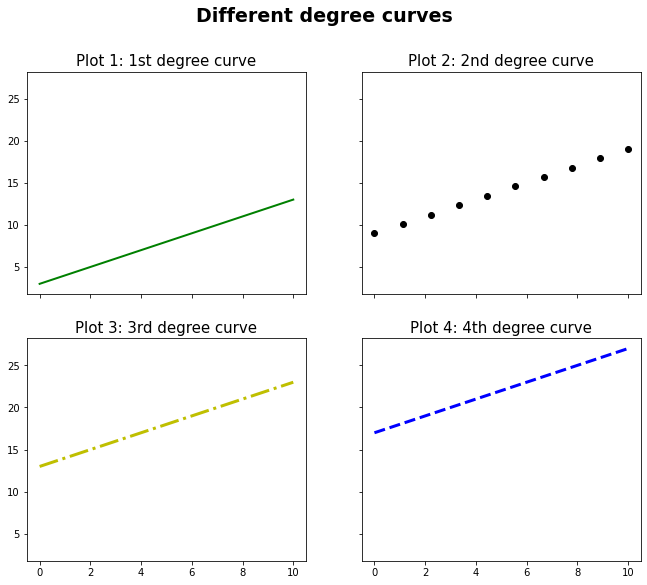

In [39]:
# Import necessary libraries
import matplotlib.pyplot as plt
import numpy as np

# Preparing the data to subplots
x = np.linspace(0, 10, 10)
y1 = x + 3
y2 = x + 9
y3 = x + 13
y4 = x + 17

# Defining figure and axes objects using matplotlib.pyplot.subplots()
fig, ax = plt.subplots(2, 2, figsize=[11, 9])

fig.suptitle('Different degree curves', fontsize=19, fontweight='bold')

# Plot the subplots
# Plot 1
ax[0,0].plot(x, y1, 'g', linewidth=2)
ax[0,0].set_title('Plot 1: 1st degree curve', fontsize=15)

# Plot 2
ax[0,1].scatter(x, y2, color='k')
ax[0,1].set_title('Plot 2: 2nd degree curve', fontsize=15)

# Plot 3
ax[1,0].plot(x, y3, '-.y', linewidth=3)
ax[1,0].set_title('Plot 3: 3rd degree curve', fontsize=15)

# Plot 4
ax[1,1].plot(x, y4, '--b', linewidth=3)
ax[1,1].set_title('Plot 4: 4th degree curve', fontsize=15)

plt.show()

# ---------------------------------------------------------------------

# Defining figure and axes objects using matplotlib.pyplot.subplots()
fig, ax = plt.subplots(2, 2, sharex=True, sharey=True, figsize=[11, 9])

fig.suptitle('Different degree curves', fontsize=19, fontweight='bold')

# Plot the subplots
# Plot 1
ax[0,0].plot(x, y1, 'g', linewidth=2)
ax[0,0].set_title('Plot 1: 1st degree curve', fontsize=15)

# Plot 2
ax[0,1].scatter(x, y2, color='k')
ax[0,1].set_title('Plot 2: 2nd degree curve', fontsize=15)

# Plot 3
ax[1,0].plot(x, y3, '-.y', linewidth=3)
ax[1,0].set_title('Plot 3: 3rd degree curve', fontsize=15)

# Plot 4
ax[1,1].plot(x, y4, '--b', linewidth=3)
ax[1,1].set_title('Plot 4: 4th degree curve', fontsize=15)

plt.show()

In [6]:
com_crise = loadmat(f'/mnt/c/Users/davi.nascimento/Documents/siena_eeg_ecg/data/processed/ecg_segments/com_crise/{file}.mat')['QRS_com_crise']

sem_crise = loadmat(f'/mnt/c/Users/davi.nascimento/Documents/siena_eeg_ecg/data/processed/ecg_segments/sem_crise/{file}.mat')['QRS_sem_crise']

Text(0.5, 0.98, 'PN00-1')

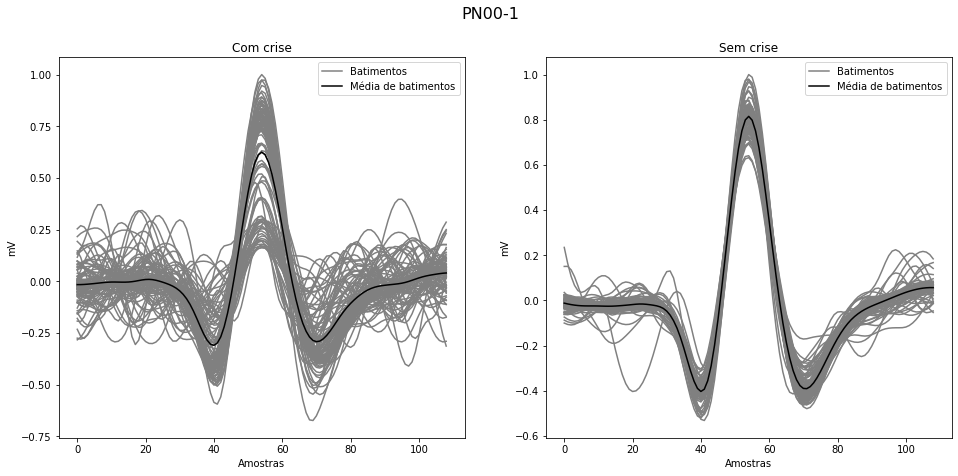

In [7]:
fig, axs = plt.subplots(1, 2, figsize=(16, 7))

cont1 = 0

for i in range(com_crise.shape[1]):
    if cont1 == 0:
        line_legend = 'Batimentos'
    else:
        line_legend = None
    axs[0].plot(com_crise[:,i], color='gray', label=line_legend)
    cont1+=1

axs[0].plot(com_crise.mean(axis=1), color='black', label='Média de batimentos')


axs[0].set_ylabel('mV')
axs[0].set_xlabel('Amostras')
axs[0].set_title("Com crise")
axs[0].legend()

cont2 = 0

for i in range(sem_crise.shape[1]):
    if cont2 == 0:
        line_legend = 'Batimentos'
    else:
        line_legend = None
    axs[1].plot(sem_crise[:,i], color='gray', label=line_legend)
    cont2+=1

axs[1].plot(sem_crise.mean(axis=1), color='black', label='Média de batimentos')


axs[1].set_ylabel('mV')
axs[1].set_xlabel('Amostras')
axs[1].set_title("Sem crise")
axs[1].legend()


fig.suptitle(file, fontsize=16)


In [47]:
fig.savefig(f"{ROOT_PATH}reports/figures/batimentos/{file}.jpg")